Handwritten Digit recognition using a convolutonal neural network and MNIST dataset
-Load Data from MNIST
-Split data into train, val, test sets
-20% of trianing data we will use for validation so 48k for training and 12k for validation

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

train_data, validation_data, train_labels, validation_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=1) # 0.25 x 0.8 = 0.2

# The size of the data
train_data.shape, train_labels.shape, validation_data.shape, validation_labels.shape, test_data.shape, test_labels.shape

((48000, 28, 28),
 (48000,),
 (12000, 28, 28),
 (12000,),
 (10000, 28, 28),
 (10000,))

- View the first few digits with there labels

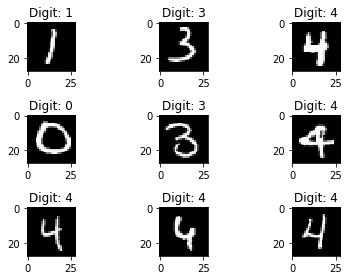

In [4]:

## View the top entries as images
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    
    plt.imshow(train_data[i], cmap=plt.get_cmap('gray'))
    plt.title("Digit: {}".format(train_labels[i]))
    
plt.show()
plt.close()

Prepare Pixel Data
- Here we want to convert the data type to floats
- Also want to normalize the pixel values to the range [0,1]. Since they are greyscale images we just divide the values by 255


In [6]:
num_categories = 10

train_data = train_data.astype("float32")
train_data /= 255.0
validation_data = validation_data.astype('float32')
validation_data /= 255.0
train_labels = keras.utils.to_categorical(train_labels,num_categories)
validation_labels = keras.utils.to_categorical(validation_labels,num_categories)


In [7]:


# Build the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), activation = "relu", input_shape = (28,28,1)
))
model.add(Conv2D(64,(5,5),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_categories, activation = "softmax"))

# Complie the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Train the model
batch_size = 128
num_epoch = 6
model_log = model.fit(train_data.reshape(train_data.shape[0],28,28,1), train_labels,
          validation_data=(validation_data.reshape(validation_data.shape[0],28,28,1), validation_labels),
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          )


Train on 48000 samples, validate on 12000 samples
Epoch 1/6
 8832/48000 [====>.........................] - ETA: 2:24 - loss: 1.9356 - accuracy: 0.3708

KeyboardInterrupt: 

In [ ]:
## Predict the model
ypred = model.predict(test.reshape(-1,28,28,1))
np.savetxt("pred.csv", ypred, delimiter=",")

In [143]:
# convert output to numbers and store to csv
ypred_num = []
for y in ypred:
    for i in range(10):
        if y[i] == 1:
            ypred_num.append(i)

with open('pred.csv', 'w') as file:
    for n in ypred_num:
        file.write("%i\n" % n)